In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn import metrics

In [4]:
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, log_loss,  confusion_matrix
from sklearn.model_selection import train_test_split


# Модуль 2

### Задание 2.12.7

In [2]:
vis_data = pd.read_csv("./data/train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("./data/latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

In [3]:
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,...,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,3.0,S. WICKER,CHICAGO,IL,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,Detroit,MI,...,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"14512 sussex, Detroit MI",42.394657,-83.194265


In [4]:
vis_data.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'mailing_address_str_number', 'mailing_address_str_name', 'city',
       'state', 'zip_code', 'non_us_str_code', 'country', 'ticket_issued_date',
       'hearing_date', 'violation_code', 'violation_description',
       'disposition', 'fine_amount', 'admin_fee', 'state_fee', 'late_fee',
       'discount_amount', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance', 'address', 'lat',
       'lon'],
      dtype='object')

In [5]:
dt_issued_date = pd.to_datetime(vis_data.ticket_issued_date)
vis_data['is_weekend'] = dt_issued_date.dt.weekday > 4
num_weekend_tickets = vis_data['is_weekend'].sum()
print("Кол-во штрафов, выписанных в выходные дни:", num_weekend_tickets)

Количество штрафов, выписанных в выходные дни: 1620


### Задание 2.12.8

In [23]:
df = pd.read_csv("./data/data_flats.csv", sep=';' 
                       # encoding = 'ISO-8859-1', 
                       # low_memory = False
)
df.head(3)

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000


In [24]:
df.keys()

Index(['id', 'full_sq', 'life_sq', 'floor', 'sub_area', 'preschool_quota',
       'preschool_education_centers_raion', 'school_quota',
       'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'hospital_beds_raion',
       'healthcare_centers_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'office_raion', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'industrial_km', 'railroad_station_walk_km',
       'railroad_station_walk_min', 'public_transport_station_km',
       'public_transport_station_min_walk', 'mkad_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_market_km', 'market_shop_km',
       'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km',
       'basketball_km', 'hospice_morgue_km', 'university_km', 'workp

In [35]:
df['ecology_id'] = df.ecology.apply(lambda x: x.lower())
df.ecology_id.value_counts()

ecology
1    8017
0    7656
3    7173
4    3938
2    3685
Name: count, dtype: int64

In [26]:
# Создание словаря для сопоставления числовых значений и описания экологии
ecology_dict = {
    'no data': 0,
    'poor': 1,
    'satisfactory': 2,
    'good': 3,
    'excellent': 4
}
df.ecology_id = df.ecology_id.replace(ecology_dict)
df.ecology_id.value_counts()

ecology
1    8017
0    7656
3    7173
4    3938
2    3685
Name: count, dtype: int64

In [31]:
df['sub_area_new'] = df.sub_area.apply(lambda x: x.lower())
df.sub_area_new.value_counts()

sub_area
poselenie sosenskoe               1776
nekrasovka                        1611
poselenie vnukovskoe              1372
poselenie moskovskij               925
poselenie voskresenskoe            713
                                  ... 
molzhaninovskoe                      3
poselenie shhapovskoe                2
poselenie kievskij                   2
poselenie klenovskoe                 1
poselenie mihajlovo-jarcevskoe       1
Name: count, Length: 146, dtype: int64

In [34]:
# Создание фиктивных переменных для столбца с информацией о районе
district_dummies = pd.get_dummies(df['sub_area_new'])
data = pd.concat([df, district_dummies], axis=1)
result = data.shape[1] - 2
print("Кол-во признаков в номов датасете:", result)

Кол-во признаков в номов датасете: 201


In [17]:
# Найдем среднее арифметическое для признака "Экология"
mean_ecology = data['ecology'].mean()
mean_ecology_rounded = round(mean_ecology, 2)
print("Среднее арифметическое для признака 'Экология':", mean_ecology_rounded)

Среднее арифметическое для признака 'Экология': 1.73


### Задание 2.14.5

In [37]:
df = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
df.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [38]:
df.balance_due.isnull().sum()

0

In [49]:
# Функция для обнаружения выбросов с помощью межквартильного расстояния
def find_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outliers = find_outliers_iqr(df['balance_due'])
# print('Выбросы:\n', outliers)
cleaned_data = df.drop(outliers.index)
diff = cleaned_data['balance_due'].max() - cleaned_data['balance_due'].min()
print("Разница между макс. и мин. значениями:", diff)

Разница между макс. и мин. значениями: 1201.3


### Задание 3.5.1 ???

In [77]:
data = pd.read_csv('data/data_flats2.csv', sep=';')
data.keys()

Index(['id', 'full_sq', 'life_sq', 'floor',
       'preschool_education_centers_raion', 'school_education_centers_raion',
       'school_education_centers_top_20_raion', 'university_top_20_raion',
       'sport_objects_raion', 'additional_education_raion',
       'culture_objects_top_25_raion', 'shopping_centers_raion',
       'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km',
       'green_zone_km', 'mkad_km', 'bulvar_ring_km', 'kremlin_km',
       'price_doc'],
      dtype='object')

In [78]:
data.isnull().sum()

id                                          0
full_sq                                     0
life_sq                                  6383
floor                                     167
preschool_education_centers_raion           0
school_education_centers_raion              0
school_education_centers_top_20_raion       0
university_top_20_raion                     0
sport_objects_raion                         0
additional_education_raion                  0
culture_objects_top_25_raion                0
shopping_centers_raion                      0
metro_km_walk                              25
kindergarten_km                             0
school_km                                   0
park_km                                     0
green_zone_km                               0
mkad_km                                     0
bulvar_ring_km                              0
kremlin_km                                  0
price_doc                                   0
dtype: int64

In [79]:
data.dropna(inplace=True)

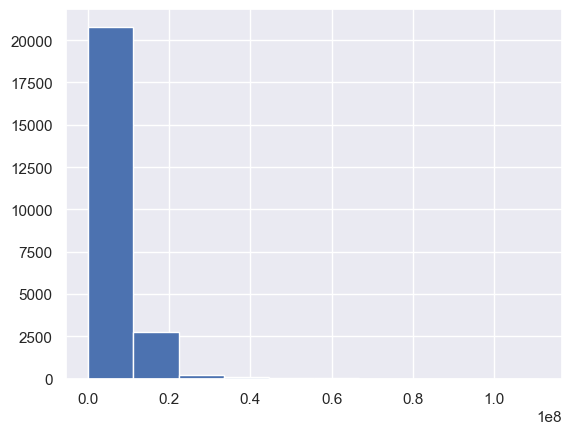

In [80]:
data.price_doc.hist();

У нашего распределения есть проблема — слишком сильный перепад. 
Много квартир в среднем сегменте, но очень мало дорогих квартир.
На практике часто в таких случаях логарифмируют переменную, 
чтобы уменьшить перепады и сгладить хвост.

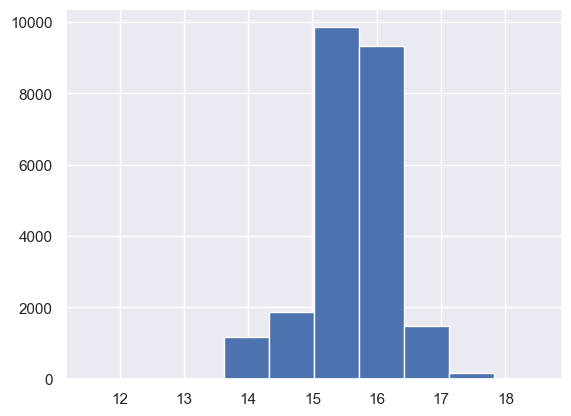

In [81]:
data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
data.price_doc.hist();

<Axes: >

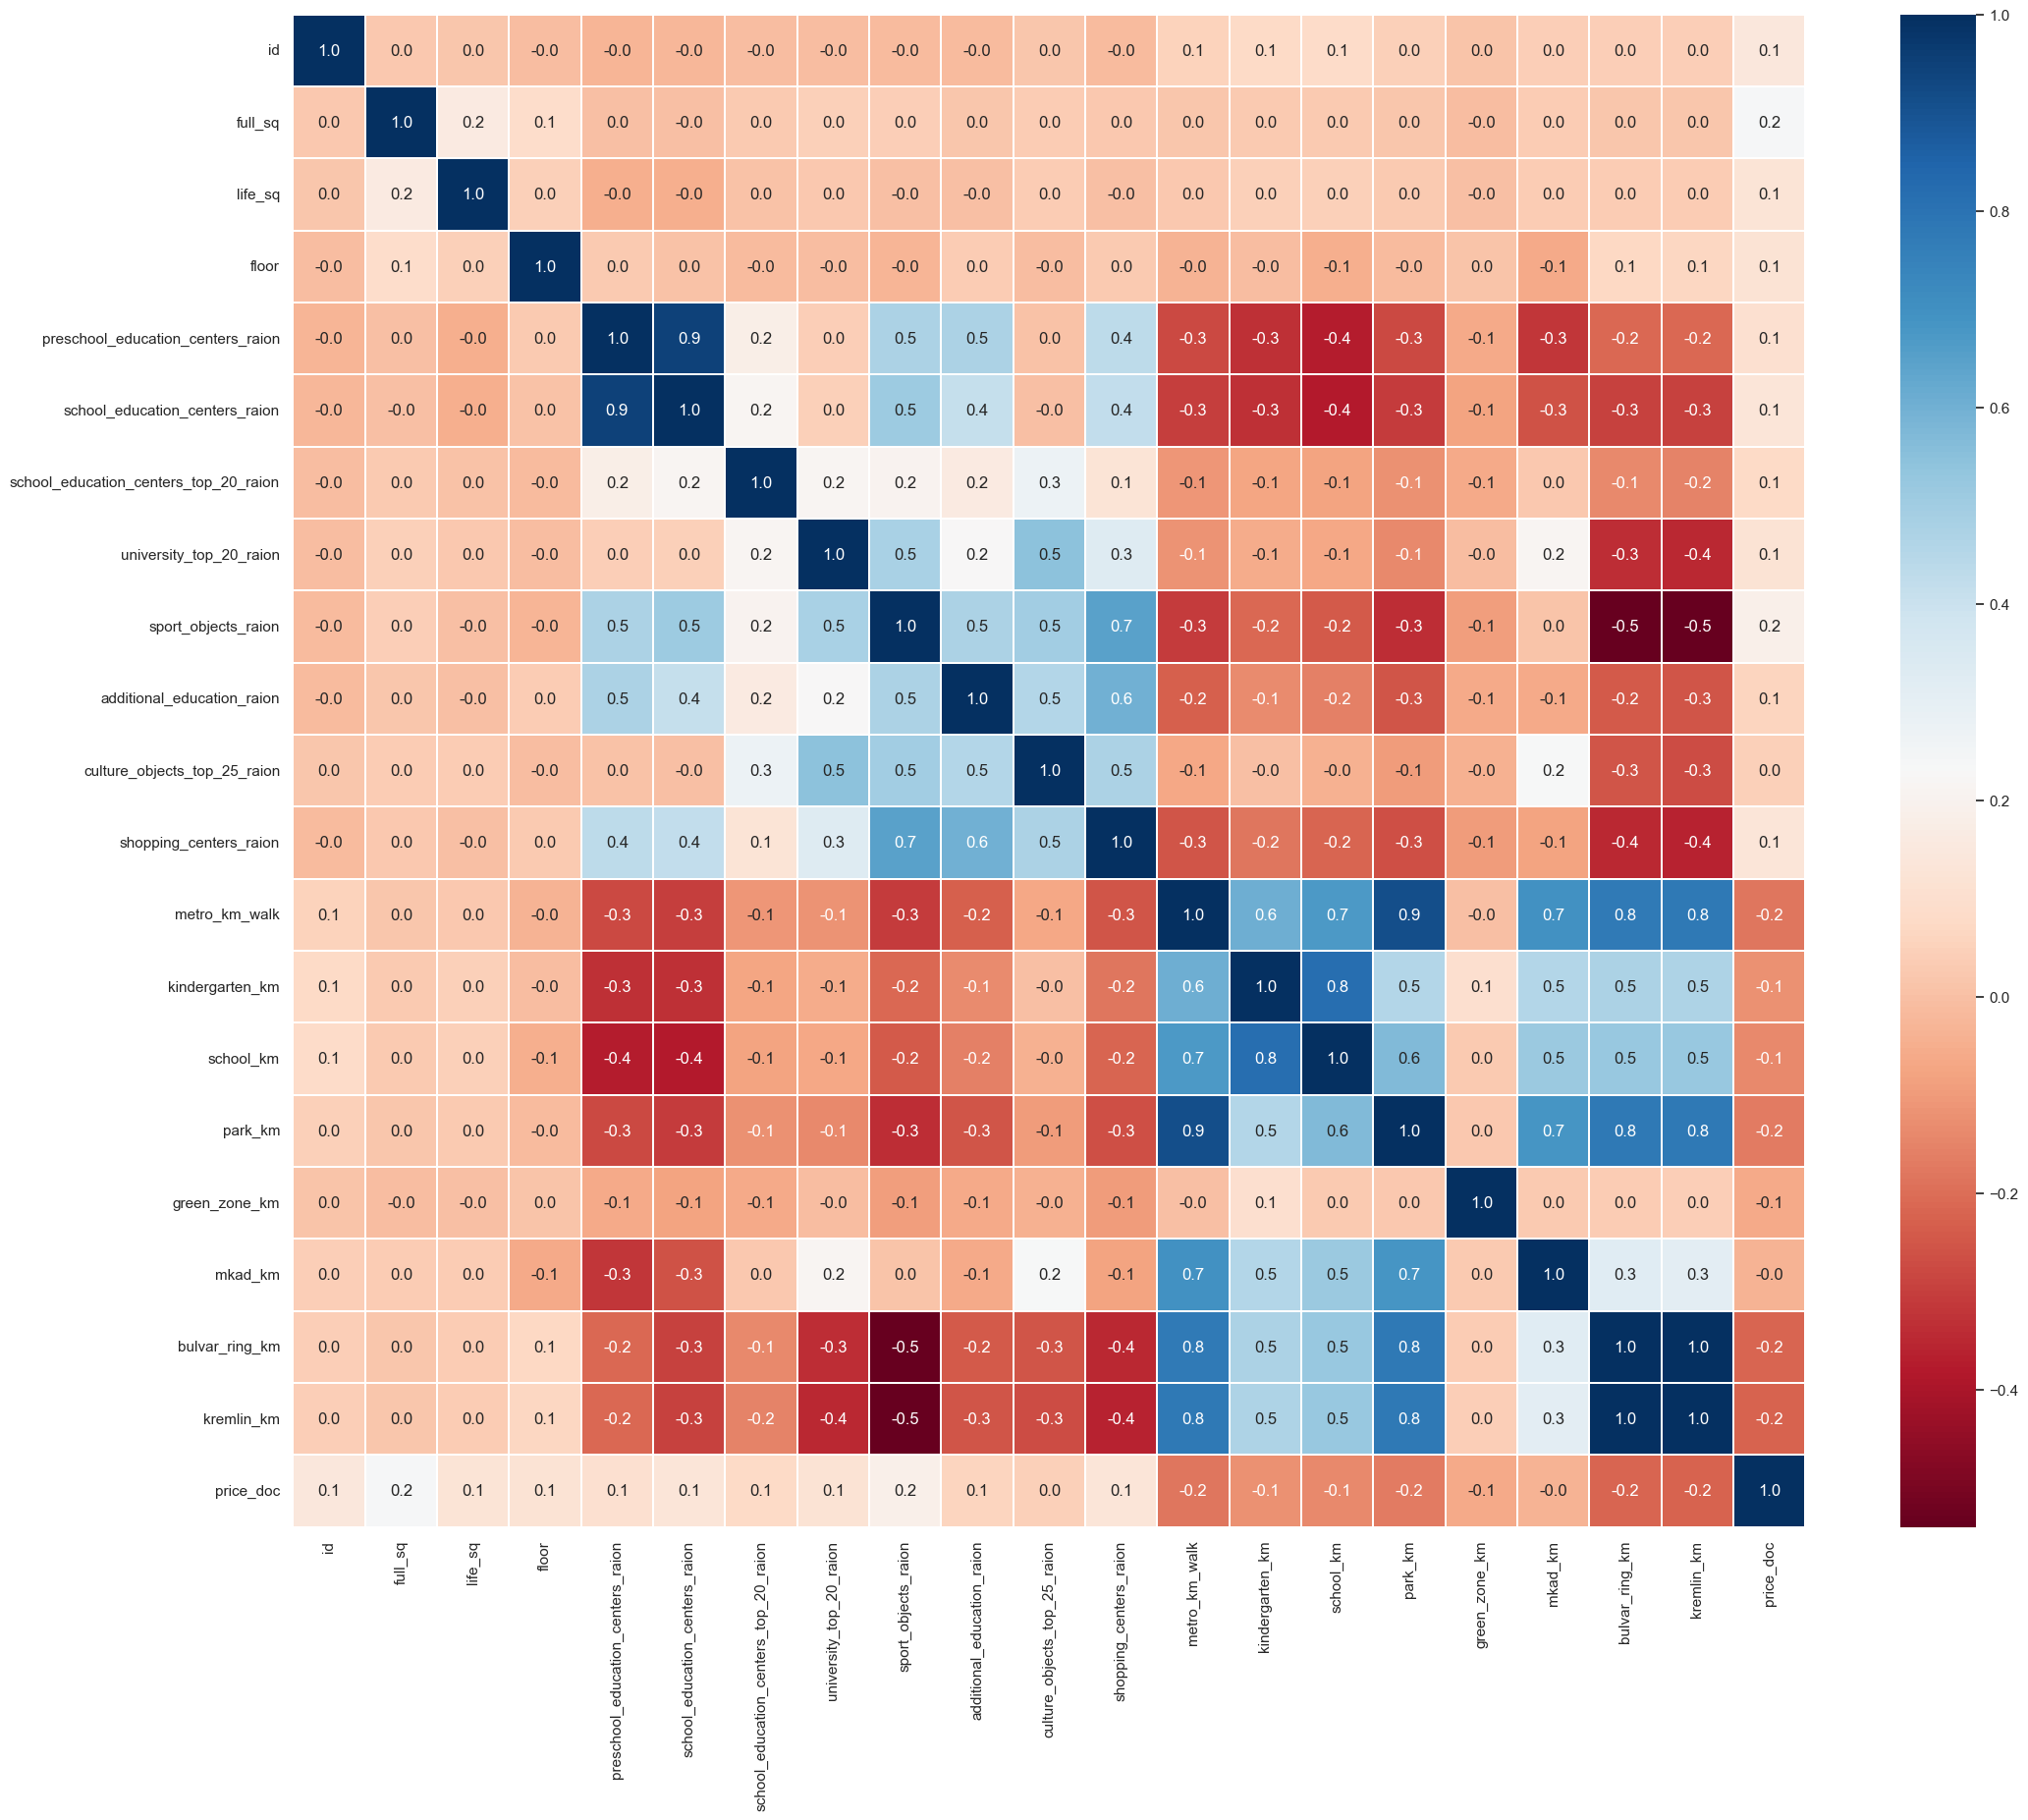

In [84]:
# отбор признаков
sns.set(font_scale=1)
plt.subplots(figsize=(25, 20))
sns.heatmap(data.corr(), square=True, annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

In [88]:
data_cut = data.drop(['id','preschool_education_centers_raion', 'kindergarten_km','park_km', 'kremlin_km'], axis=1)
data_cut

,full_sq,life_sq,floor,school_education_centers_raion,school_education_centers_top_20_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,metro_km_walk,school_km,green_zone_km,mkad_km,bulvar_ring_km,price_doc
0,43,27.0,4.0,5,0,0,7,3,0,16,1.131260,0.177975,0.600973,1.422391,13.675657,15.581952
1,34,19.0,3.0,8,0,0,6,1,1,3,0.635053,0.273345,0.065321,9.503405,8.132640,15.607270
2,43,29.0,2.0,7,0,0,5,1,0,0,1.445960,0.158072,0.453172,5.604800,8.054252,15.555977
3,89,50.0,9.0,10,0,0,17,6,0,11,0.963802,0.236455,0.106125,2.677824,18.309433,16.388123
4,77,77.0,4.0,9,0,2,25,2,0,10,0.688859,0.376838,0.236214,11.616653,0.787593,16.608603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30462,56,51.0,19.0,2,0,0,4,6,0,5,0.620661,0.566309,0.143626,5.363124,9.080098,16.143959
30464,44,27.0,7.0,4,0,0,10,3,0,9,0.679841,0.349899,0.139814,3.762408,11.118577,15.816991
30465,86,59.0,3.0,4,1,2,29,16,10,23,0.781217,0.362681,0.271861,13.100989,1.874868,17.034386
30467,64,32.0,5.0,8,0,1,11,1,0,4,2.047312,0.130667,0.227547,2.327138,12.872535,16.418200


In [89]:
y = data['price_doc']
X = data.drop(['price_doc'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

In [103]:
# Нормализация признаков с помощью RobustScaler для обучающей и тестовой выборок отдельно
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [104]:
# Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)
y_pred

array([15.54276266, 15.7715066 , 15.3686869 , ..., 15.43440465,
       15.4094817 , 15.39515913])

In [105]:
y_test

5214     15.694976
21075    15.843659
18859    15.511126
27782    15.613385
19778    15.870469
           ...    
21220    15.573856
21410    15.671809
282      15.319588
3146     15.648092
1118     15.803385
Name: price_doc, Length: 4785, dtype: float64

In [106]:
# Вычисление среднеквадратичной ошибки (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
mse_rounded = round(mse)
print("Среднеквадратичная ошибка (MSE):", mse_rounded,  mse)

Среднеквадратичная ошибка (MSE): 0 0.32624330040919514


# Модуль 3А

### Задание 3.6.1 ???

In [100]:
data = load_boston()
type(data)

sklearn.utils.Bunch

In [23]:
data['data'].shape

(506, 13)

In [31]:
def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

In [46]:
X = data.data
y = data.target

# Добавление столбца с единицами для учёта свободного члена (intercept)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

linreg_linear = LinearRegression()
theta = linreg_linear.fit(X_train, y_train)
y_pred = theta.predict(X_valid)
y_train_pred = theta.predict(X_train)

print_regression_metrics(y_valid, y_pred)
print_regression_metrics(y_train, y_train_pred)

MSE = 32.38, RMSE = 5.69
MSE = 19.75, RMSE = 4.44


### Задание 3.6.2

In [48]:
X = data.data
y = data.target

# Добавление столбца с единицами для учёта свободного члена (intercept)
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

linreg_linear = LinearRegression()
theta = linreg_linear.fit(X, y)
y_pred = theta.predict(X)

print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


### Задание 3.6.3

In [90]:
print(data['feature_names'][np.argmax(X.std(axis=0)) + 1])
print(np.max(X.std(axis=0)))

PTRATIO
168.3704950393814


### Задание 3.6.4

In [54]:
X = data.data
y = data.target

linreg_linear = LinearRegression()
theta = linreg_linear.fit(X, y)
y_pred = theta.predict(X)

print_regression_metrics(y, y_pred)

MSE = 21.89, RMSE = 4.68


### Задание 3.6.5

In [106]:
index_of_B = np.where(data.feature_names == 'B')[0][0] 
feature_B = data.feature_names[index_of_B] 

filtered_index = np.where(data.data[:, index_of_B] < 50)[0]
print(filtered_indices)

X_filtered = np.delete(data.data, filtered_index, axis=0)
y_filtered = np.delete(data.target, filtered_index, axis=0)

print("Shape of X before:", data.data.shape)
print("Shape of X after:", X_filtered.shape)

[410 411 412 415 416 418 419 423 424 425 426 427 436 437 445 450 454 456
 457 466]
Shape of X before: (506, 13)
Shape of X after: (486, 13)


In [107]:
linreg_linear = LinearRegression()
theta = linreg_linear.fit(X_filtered, y_filtered)
y_pred = theta.predict(X_filtered)

print_regression_metrics(y_filtered, y_pred)

MSE = 21.79, RMSE = 4.67


### Задание 3.6.6

### Задание 3.7.1

In [17]:
class RegOptimizer():
    def __init__(self, alpha, n_iters):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters
    
    def gradient_step(self, theta, theta_grad):
        return theta - self._alpha * theta_grad
    
    def grad_func(self, X, y, theta):
        raise NotImplementedError()

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()

        for i in range(n_iters):
            theta_grad = self.grad_func(X, y, theta)
            if np.max(np.abs(theta_grad)) < 0.01:  # Проверка условия остановки
                print("Gradient stopped at iteration", i)
                break
            theta = self.gradient_step(theta, theta_grad)

        return theta
    
    def fit(self, X, y):
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)


In [22]:
class LinReg(RegOptimizer):
    def grad_func(self, X, y, theta):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(X.dot(theta) - y)

        return grad
    
    def predict(self, X):
        if self.theta is None:
            raise Exception('You should train the model first')
        
        y_pred = X.dot(self.theta)
        
        return y_pred

In [23]:
 def prepare_boston_data():
    data = load_boston()
    X, y = data['data'], data['target']
    # Нормализовать даннные с помощью стандартной нормализации
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Добавить фиктивный столбец единиц (bias линейной модели)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

X, y = prepare_boston_data()

linreg_crit = LinReg(0.2,1000)
linreg_crit.fit(X, y)

Gradient stopped at iteration 212


### Задание 3.7.2

In [37]:
class LinRegAlgebra():
    def __init__(self):
        self.theta = None
    
    def fit(self, X, y):
        self.theta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
    
    def predict(self, X):
        return X.dot(self.theta)

In [61]:
def prepare_boston_data_new():
    data = load_boston()
    X, y = data['data'], data['target']    
    X = np.hstack([X, np.sqrt(X[:, 5:6]), X[:, 6:7] ** 3, X[:, 7:8] ** 2])

    X = (X - X.mean(axis=0)) / X.std(axis=0)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

def print_regression_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f'MSE = {mse:.2f}, RMSE = {rmse:.2f}')

def train_validate(X, y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

    linreg_alg = LinRegAlgebra()
    linreg_alg.fit(X_train, y_train)

    y_pred = linreg_alg.predict(X_valid)
    print_regression_metrics(y_valid, y_pred)

In [62]:
X, y = prepare_boston_data()
train_validate(X, y)

MSE = 23.38, RMSE = 4.84


C:\An\Skillfactory\ML_M1\pythonProject\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [63]:
X, y = prepare_boston_data_new()
train_validate(X, y)

MSE = 13.59, RMSE = 3.69


C:\An\Skillfactory\ML_M1\pythonProject\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

### Задание 3.7.3

In [65]:
def prepare_boston_data_new():
    data = load_boston()
    X, y = data['data'], data['target']    
    X = np.hstack([X, np.sqrt(X[:, 5:6]), X[:, 6:7] ** 3])
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    
    return X, y

X, y = prepare_boston_data_new()
train_validate(X, y)

MSE = 14.28, RMSE = 3.78


C:\An\Skillfactory\ML_M1\pythonProject\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

# Модуль 3B

### Задание 3B.2.1

In [70]:
politic_all = 15
p_econom = 9
p_politic = 15 - p_econom

economy_all = 20
e_politic = 6
e_econome = 20 - e_politic

TP = p_politic
TN = e_econome

# acc = (TN + TP)/(TP + TN + FP + FN)
acc = (TN + TP)/(politic_all + economy_all)
print(f'acc = {acc:.2f}')

acc = 0.57


### Задание 3B2.2

In [73]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

log_reg_model = LogisticRegression(random_state=50)
log_reg_model.fit(X_train, y_train)

y_pred = log_reg_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'acc = {acc:.2f}')

acc = 0.98


C:\An\Skillfactory\ML_M1\pythonProject\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Задание 3B.3

In [81]:
df = pd.read_csv("./data/train_mobile.csv", sep=';', encoding = 'ISO-8859-1', low_memory = False)
# data = vdata.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1


### Задание 3B.3.1 Отбор признаков

In [86]:
correlation = df.corr()['price_range'].abs().sort_values(ascending=False)

# Выбор пяти признаков с наибольшей корреляцией
top_features = correlation[1:6].index  # Исключаем целевую переменную
top_correlation_values = correlation[1:6].values

print("Top 5 features with highest correlation with price_range:")
selected_features = []
for feature, corr_value in zip(top_features, top_correlation_values):
    print(f"Feature: {feature}, Correlation: {corr_value:.2f}")
    selected_features.append(feature)

Top 5 features with highest correlation with price_range:
Feature: ram, Correlation: 0.82
Feature: battery_power, Correlation: 0.15
Feature: px_width, Correlation: 0.12
Feature: px_height, Correlation: 0.10
Feature: touch_screen, Correlation: 0.04


In [87]:
selected_features

['ram', 'battery_power', 'px_width', 'px_height', 'touch_screen']

### Задание 3B.3.2 Выбор метрики 
### Задание 3B.3.3 Значение метрики

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['price_range'], test_size=0.2, random_state=31)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
precision = precision_score(y_test, y_pred)
print(f'precision = {precision:.4f}')

precision = 0.9859


### Задание 3.5.3 ???

In [114]:
y = np.array([0.2, 0.8, 2, 0.6])
y_pred = np.array([0, 0, 1 ,1])

# Ограничим значения y_pred, чтобы избежать ошибок в логарифме
y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

logloss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
print(f"logloss = {logloss:.2f}")

logloss = 3.45


In [119]:
logloss = -np.mean(sum(-y * np.log(y_pred)))
print(f"logloss = {logloss:.2f}")

logloss = -34.54


In [131]:
y_true = np.array([0.2, 0.8, 2, 0.6])
y_pred = np.array([0, 0, 1 ,1])

logloss = log_loss(y_true, y_pred)
print(f"logloss: {logloss:.2f}")

ValueError: Unknown label type: (array([0.2, 0.8, 2. , 0.6]),)

In [133]:
# Преобразование в массивы вероятностей
y_true_proba = np.zeros((len(y_true), 3))
y_true_proba[np.arange(len(y_true)), np.round(y_true).astype(int)] = 1

y_pred_proba = np.zeros((len(y_pred), 3))
y_pred_proba[:, 0] = 1 - y_pred
y_pred_proba[:, 1] = y_pred

# Рассчитываем log loss
logloss = log_loss(y_true_proba, y_pred_proba)
print(f"logloss: {logloss:.2f}")

logloss: 17.27


### Задание 3.5.4

In [126]:
y_true = np.array([[0, 0, 1], 
                   [0, 0, 1], 
                   [1, 0, 0]])
y_pred = np.array([[0.2, 0.3, 0.5],
                         [0, 0, 1],
                         [0.1, 0, 0.9]])

logloss = log_loss(y_true, y_pred)
print(f"logloss: {logloss:.2f}")

logloss: 1.00


### Задание 3.6.1

In [10]:
adult = pd.read_csv('../data/adult-income.data',
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

In [11]:
adult.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [12]:
adult.keys()

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [13]:
# adult['salary'] = adult['salary'].apply(lambda x: 0 if x == ' <=50K' else 1)

adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
# Избавиться от лишних признаков
adult.drop(['native-country'], axis=1, inplace=True)
# Сделать one-hot encoding для некоторых признаков
adult = pd.get_dummies(adult, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

In [14]:
# Нормализовать нуждающиеся в этом признаки
a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

In [15]:
X = adult[list(set(adult.columns) - set(['salary']))].values
y = adult['salary'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# logistic_model = LogisticRegression()
# logistic_model.fit(X_train, y_train)
# y_pred = logistic_model.predict(X_test)
# f1 = f1_score(y_test, y_pred)

logistic_model = LogisticRegression()
logistic_model.fit(X, y)
y_pred = logistic_model.predict(X)
f1 = f1_score(y, y_pred)
print(f"F1-score: {f1:.2f}")

F1-score: 0.66


C:\An\Skillfactory\ML_M1\pythonProject\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Задание 3.6.2

In [16]:
cm = confusion_matrix(y, y_pred)
TP = cm[1, 1]  # True Positive
TN = cm[0, 0]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative

print(cm)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)
print("True Positive (TP):", TP)

[[23030  1690]
 [ 3124  4717]]
True Negative (TN): 23030
False Positive (FP): 1690
False Negative (FN): 3124
True Positive (TP): 4717


### Задание 3.6.3

In [17]:
# Отрисовать ROC кривую
def calc_and_plot_roc(y_true, y_pred_proba):
    # Посчитать значения ROC кривой и значение площади под кривой AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.title('Receiver Operating Characteristic', fontsize=15)
    plt.xlabel('False positive rate (FPR)', fontsize=15)
    plt.ylabel('True positive rate (TPR)', fontsize=15)
    plt.legend(fontsize=15)

In [18]:
# Вычислить вероятности принадлежности классу 1 для каждого объекта из валидационной выборки
y_pred_proba = sigmoid(X_valid, theta)
calc_and_plot_roc(y_valid, y_pred_proba)

NameError: name 'sigmoid' is not defined

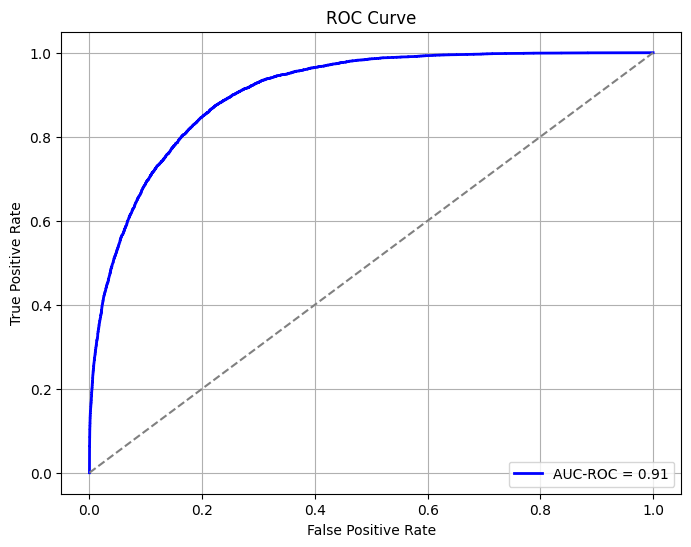

AUC-ROC: 0.91


In [19]:
# Вычисляем вероятности принадлежности к классу 1
y_pred_proba = logistic_model.predict_proba(X)[:, 1]

# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# Вычисляем AUC-ROC
auc_roc = roc_auc_score(y, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC-ROC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

print(f'AUC-ROC: {auc_roc:.2f}')

### Задание 3.6.4

In [20]:
logistic_model = LogisticRegression(penalty='none')
logistic_model.fit(X, y)
y_pred = logistic_model.predict(X)
f1 = f1_score(y, y_pred)
print(f"F1 score: {f1:.2f}")

F1 score: 0.66


C:\An\Skillfactory\ML_M1\pythonProject\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Задание 3.6.5

In [24]:
# Задаем диапазон значений коэффициента регуляризации
C_values = np.arange(0.01, 1.01, 0.01)

# Инициализируем переменные для максимального значения F1 score и соответствующего коэффициента регуляризации
max_f1_score = -1
best_C = None

# Перебираем значения коэффициента регуляризации
for C in C_values:
    # Создаем и обучаем модель логистической регрессии с текущим значением коэффициента регуляризации
    logistic_model = LogisticRegression(penalty='l2', C=C, solver='liblinear')
    logistic_model.fit(X, y)
    
    # Получаем предсказания на тестовой выборке
    y_pred = logistic_model.predict(X)
    
    # Рассчитываем F1 score для текущего значения коэффициента регуляризации
    f1 = f1_score(y, y_pred)
    
    # Обновляем максимальное значение F1 score и соответствующий коэффициент регуляризации
    if f1 > max_f1_score:
        max_f1_score = f1
        best_C = C

print(f"Наилучший F1 score: {max_f1_score:.2f}")
print(f"Коэф регуляризации с наилучшим F1 score: {best_C:.2f}")

Наилучший F1 score: 0.66
Коэф регуляризации с наилучшим F1 score: 0.99


### Задание 3.6.6

In [29]:
adult = pd.read_csv('../data/adult-income.data',
                    names=['age', 'workclass', 'fnlwgt', 'education',
                           'education-num', 'marital-status', 'occupation',
                           'relationship', 'race', 'sex', 'capital-gain',
                           'capital-loss', 'hours-per-week', 'native-country', 'salary'])

adult['salary'] = (adult['salary'] != ' <=50K').astype('int32')
country_counts = adult['native-country'].value_counts()
country_counts

native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [30]:
other_countries = country_counts[country_counts < 100].index
adult.loc[adult['native-country'].isin(other_countries), 'native-country'] = 'other'
adult['native-country'].value_counts()

native-country
 United-States    29170
other              1389
 Mexico             643
 ?                  583
 Philippines        198
 Germany            137
 Canada             121
 Puerto-Rico        114
 El-Salvador        106
 India              100
Name: count, dtype: int64

In [31]:
# Сделать one-hot encoding для некоторых признаков
adult = pd.get_dummies(adult, columns=['native-country', 'workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'])

# Нормализовать нуждающиеся в этом признаки
a_features = adult[['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']].values
norm_features = (a_features - a_features.mean(axis=0)) / a_features.std(axis=0)
adult.loc[:, ['age', 'education-num', 'hours-per-week', 'fnlwgt', 'capital-gain', 'capital-loss']] = norm_features

X = adult[list(set(adult.columns) - set(['salary']))].values
y = adult['salary'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# logistic_model = LogisticRegression()
# logistic_model.fit(X_train, y_train)
# y_pred = logistic_model.predict(X_test)
# f1 = f1_score(y_test, y_pred)

logistic_model = LogisticRegression()
logistic_model.fit(X, y)
y_pred = logistic_model.predict(X)
f1 = f1_score(y, y_pred)
print(f"F1-score: {f1:.2f}")

F1-score: 0.66


C:\An\Skillfactory\ML_M1\pythonProject\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Модуль 4. Кластеризация

In [140]:
from sklearn.cluster import KMeans
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler  # k-means

from sklearn.mixture import GaussianMixture # EM-алгоритм
from sklearn.cluster import AgglomerativeClustering # агломеративная
import warnings
from sklearn.neighbors import kneighbors_graph # матрица смежности

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import homogeneity_score, completeness_score


In [47]:
def plotResClasterization(X, y):
    # plt.rcParams['figure.figsize'] = 5, 5
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y])

### Задание 4.5.2 & Задание 4.6.3

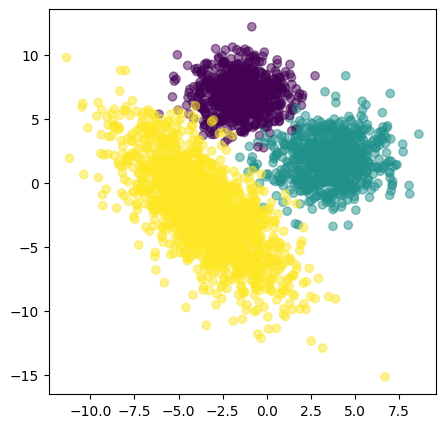

In [48]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [49]:
# X = StandardScaler().fit_transform(X)
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)

y_pred = k_means.labels_.astype(int)
centroids = np.round(k_means.cluster_centers_).astype(int)
print(centroids)

[[-3 -3]
 [-2  6]
 [ 4  2]]


1320 938 742 

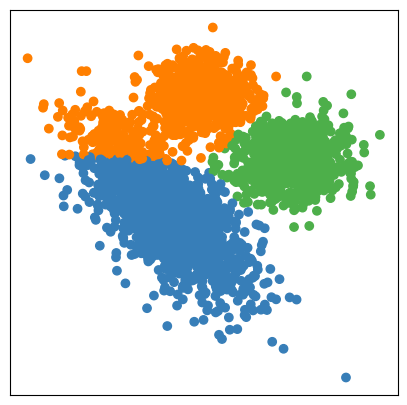

In [50]:
cluster_labels, cluster_counts = np.unique(y_pred, return_counts=True)
for count in cluster_counts:
    print(count, end=' ')

plotResClasterization(X, y_pred)

### Задание 4.6.2 & Задание 4.6.3

[[ 4  2]
 [-2  7]
 [-4 -2]]


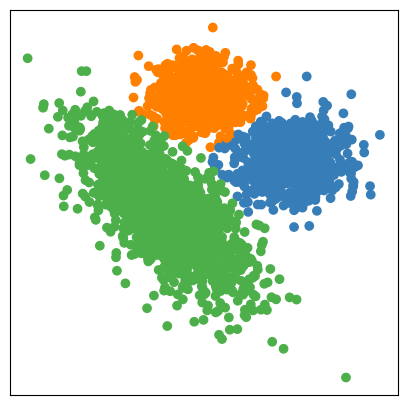

In [57]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# X = StandardScaler().fit_transform(X)
em_gm = GaussianMixture(n_components=3, random_state=42)
em_gm.fit(X)
y_pred = em_gm.predict(X)

# print(em_gm.means_)
centroids = np.round(em_gm.means_).astype(int)
print(centroids)

plotResClasterization(X, y_pred)

In [77]:
unique, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

dict(zip(unique, counts))

1424 742 834 

{0: 1424, 1: 742, 2: 834}

### Задание 4.7.2 ??? & Задание 4.7.3

[2 2 0 ... 1 1 1]
1112 1142 746 

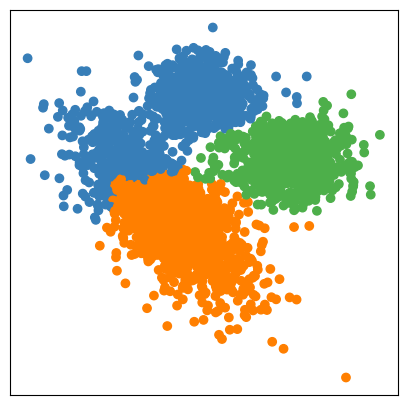

In [84]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
# connectivity = 0.5 * (connectivity + connectivity.T) # делаем матрицу смежности симметричной

ac = AgglomerativeClustering(n_clusters=3) 

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)

centroids = np.round(ac.labels_).astype(int)
print(centroids)

unique, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

plotResClasterization(X, y_pred)

### Задание 4.7.4

1486 746 768 

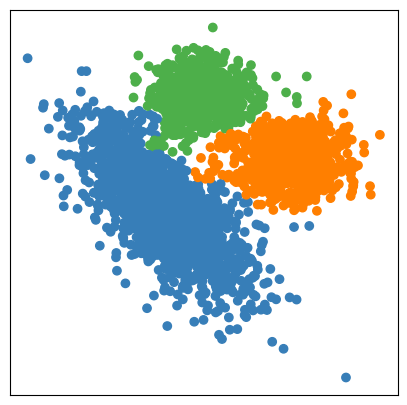

In [91]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity) 

with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)

unique, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

plotResClasterization(X, y_pred)

### Задание 4.7.5

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [125.0, 125.0, 150.0, 150.0],
  [102.5, 102.5, 137.5, 137.5],
  [80.0, 80.0, 120.0, 120.0],
  [50.0, 50.0, 100.0, 100.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [230.0, 230.0, 252.5, 252.5],
  [210.0, 210.0, 241.25, 241.25],
  [182.5, 182.5, 225.625, 225.625],
  [275.0, 275.0, 285.0, 285.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [280.0, 280.0, 302.5, 302.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [395.0, 395.0, 405.0, 

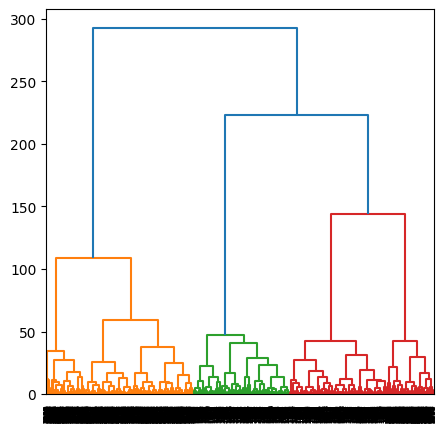

In [90]:
Z = linkage(X, "ward")
dendrogram(Z, leaf_rotation=90.)

### Задание 4.8.2 & Задание 4.8.3

368 656 721 1255 {-1: 368, 0: 656, 1: 721, 2: 1255}


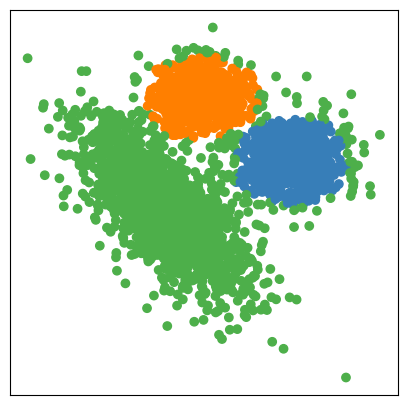

In [99]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)

unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

plotResClasterization(X, y_pred)

### Задание 4.8.4

{-1: 583, 0: 603, 1: 681, 2: 1133}


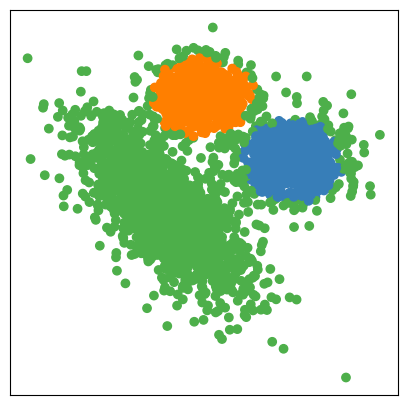

In [100]:
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)

unique, counts = np.unique(y_pred, return_counts=True)
print(dict(zip(unique, counts)))

plotResClasterization(X, y_pred)

### Задание 4.11.1

In [123]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

count = 3
k_means = KMeans(n_clusters=count, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_.astype(int)
print('KMeans', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))

ac = AgglomerativeClustering(n_clusters=count) 
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)
print('AgglomerativeClustering', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))

em_gm = GaussianMixture(n_components=count, random_state=42)
em_gm.fit(X)
y_pred = em_gm.predict(X)
print('GaussianMixture', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)
print('DBSCAN', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))


KMeans 0.51
AgglomerativeClustering 0.48
GaussianMixture 0.5
DBSCAN 0.45


### Задание 4.11.3

In [142]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [127]:
def findNumberClusters(count):
    print(count)
    
    k_means = KMeans(n_clusters=count, random_state=42)
    k_means.fit(X)
    y_pred = k_means.labels_.astype(int)
    print('KMeans', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))
    
    ac = AgglomerativeClustering(n_clusters=count) 
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(int)
    print('AgglomerativeClustering', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))
    
    em_gm = GaussianMixture(n_components=count, random_state=42)
    em_gm.fit(X)
    y_pred = em_gm.predict(X)
    print('GaussianMixture', np.round(silhouette_score(X=X, labels=y_pred, metric='euclidean'),2))

In [130]:
for i in range(10-1):
    count = i + 2
    findNumberClusters(count)

2
KMeans 0.46
AgglomerativeClustering 0.41
GaussianMixture 0.46
3
KMeans 0.51
AgglomerativeClustering 0.48
GaussianMixture 0.5
4
KMeans 0.51
AgglomerativeClustering 0.48
GaussianMixture 0.51
5
KMeans 0.48
AgglomerativeClustering 0.47
GaussianMixture 0.48
6
KMeans 0.46
AgglomerativeClustering 0.44
GaussianMixture 0.46
7
KMeans 0.4
AgglomerativeClustering 0.36
GaussianMixture 0.44
8
KMeans 0.33
AgglomerativeClustering 0.35
GaussianMixture 0.33
9
KMeans 0.33
AgglomerativeClustering 0.28
GaussianMixture 0.31
10
KMeans 0.33
AgglomerativeClustering 0.28
GaussianMixture 0.31


### Задание 4.12.1 Однородность

In [137]:
X = StandardScaler().fit_transform(X)

k_means = KMeans(n_clusters=count, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_.astype(int)
print('KMeans', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

ac = AgglomerativeClustering(n_clusters=count) 
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)
print('AgglomerativeClustering', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

em_gm = GaussianMixture(n_components=count, random_state=42)
em_gm.fit(X)
y_pred = em_gm.predict(X)
print('GaussianMixture', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)
print('DBSCAN', np.round(homogeneity_score(labels_true=y, labels_pred=y_pred),2))

KMeans 0.93
AgglomerativeClustering 0.92
GaussianMixture 0.94
DBSCAN 0.0


### Задание 4.13.1 & Задание 4.13.2 Полнота

In [147]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))
X = StandardScaler().fit_transform(X)

count = 3

k_means = KMeans(n_clusters=count, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_.astype(int)
print('KMeans', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

ac = AgglomerativeClustering(n_clusters=count) 
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(int)
print('AgglomerativeClustering', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

em_gm = GaussianMixture(n_components=count, random_state=42)
em_gm.fit(X)
y_pred = em_gm.predict(X)
print('GaussianMixture', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)
print('DBSCAN', np.round(completeness_score(labels_true=y, labels_pred=y_pred),2))

KMeans 0.78
AgglomerativeClustering 0.91
GaussianMixture 0.93
DBSCAN 0.08
